# Problem 8: Logistic Regression and KNN Classifiers

In this project we will implement the logistic regression and KNN classifiers for the "Wheat Seeds" dataset.

## Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
data = './seeds.csv'

df = pd.read_csv(data)

## Explanatory Data Analysis
Now we will explore the "Wheat Seeds" dataset to familiarize ourselves with it.

In [3]:
df.shape

(199, 8)

There are 199 instances of data each with 7 features (last column being the label).

In [4]:
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [6]:
df["Type"].unique()

array([1, 2, 3])

There are 3 distinct classes of wheat seeds.

Now we can take look at the data visually. Since, there are more than two features (8 total), we will plot scatter plots of any two features together. Then, using these visuals, we will determine which two features together separate the different classes of data from each other, more precisely. 

In [7]:
# Separate the features from the target variable
column_names = df.columns.to_numpy()[:-1]
print(column_names)
data = df.to_numpy()
X = data[:, 0:7]
Y = data[:, 7:].reshape(-1).astype(int)
Y

['Area' 'Perimeter' 'Compactness' 'Kernel.Length' 'Kernel.Width'
 'Asymmetry.Coeff' 'Kernel.Groove']


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3])

In [8]:
def visualize(X, Y, column_names):
    plt.style.use("bmh")

    # Create scatterplots
    num_features = X.shape[1]
    plt.figure(figsize=(16, 24)) 
    
    # Loop through each pair of features
    plot_count = 1
    for feature1 in range(num_features - 1):
        for feature2 in range(feature1 + 1, num_features):
            plt.subplot(num_features - 1, num_features // 2 + 1, plot_count)
            for label in np.unique(Y):
                # Index correctly by using np.where to find indices where Y equals the current label
                indices = np.where(Y == label)
                plt.scatter(X[indices, feature1].flatten(), X[indices, feature2].flatten(), label=f'Label {label}')
            
            plt.title(f'{column_names[feature1]} vs {column_names[feature2]}')
            plt.xlabel(column_names[feature1])
            plt.ylabel(column_names[feature2])
            plt.legend()
            plt.grid(True)
            plot_count += 1
    
    plt.tight_layout()
    # plt.savefig("dataxx.png", dpi=50)
    plt.show()

(199, 7)


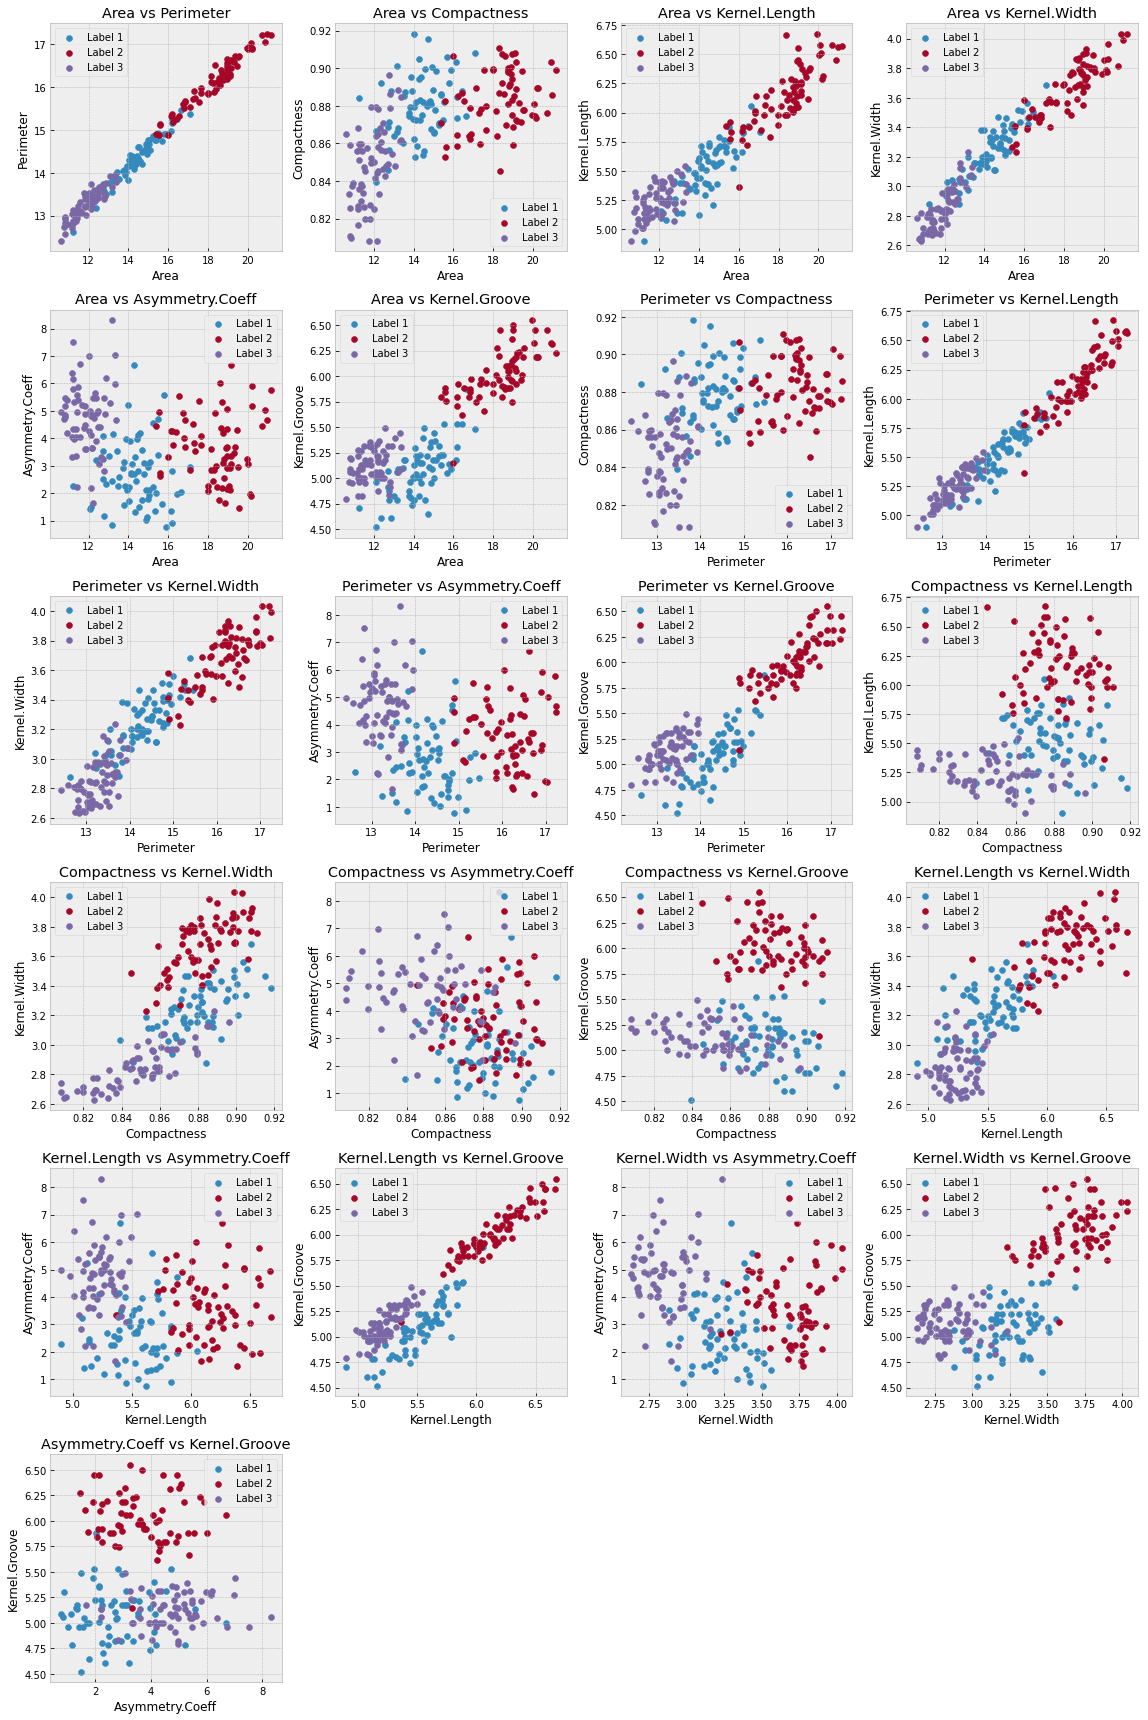

In [9]:
print(X.shape)
visualize(X, Y, column_names)

Now let us also take a look at the normalized version of the data visualized. For this we will use the Z-score scaling to normalize the data to have same scale features.

In [10]:
def zscore_normalize(X):
    # Calculate the needed statistics
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Z-score formula
    X_norm = (X - mean) / std
    
    return X_norm

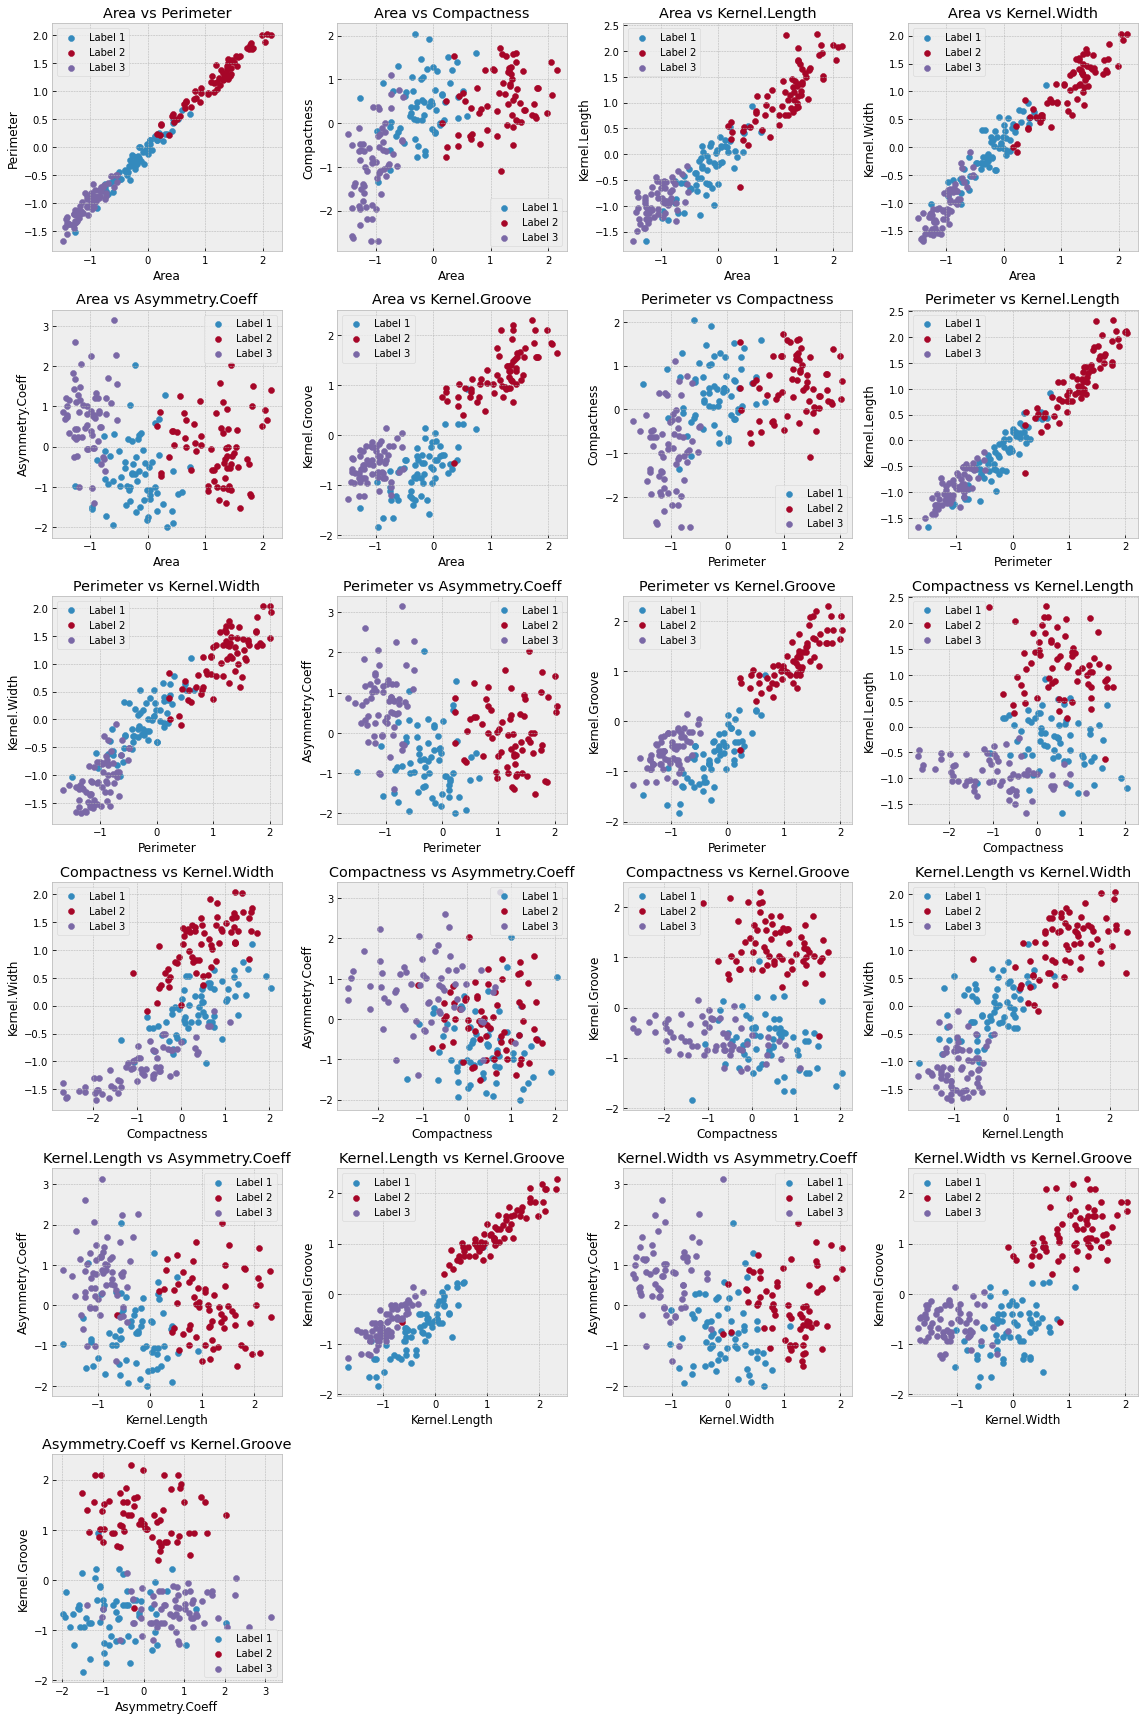

In [11]:
X_norm = zscore_normalize(X)
visualize(X_norm, Y, column_names)

Looking at the normalized and the non-normalized plots, we can see the best separation of the classes happens in the "Kernel.Length vs Kernel.Groove" plot. Thus, selecting this pair of features can be a good feature selection  choice as it nearly perfectly separates the classes.

Now, we plot the histogram of classes for each feature.

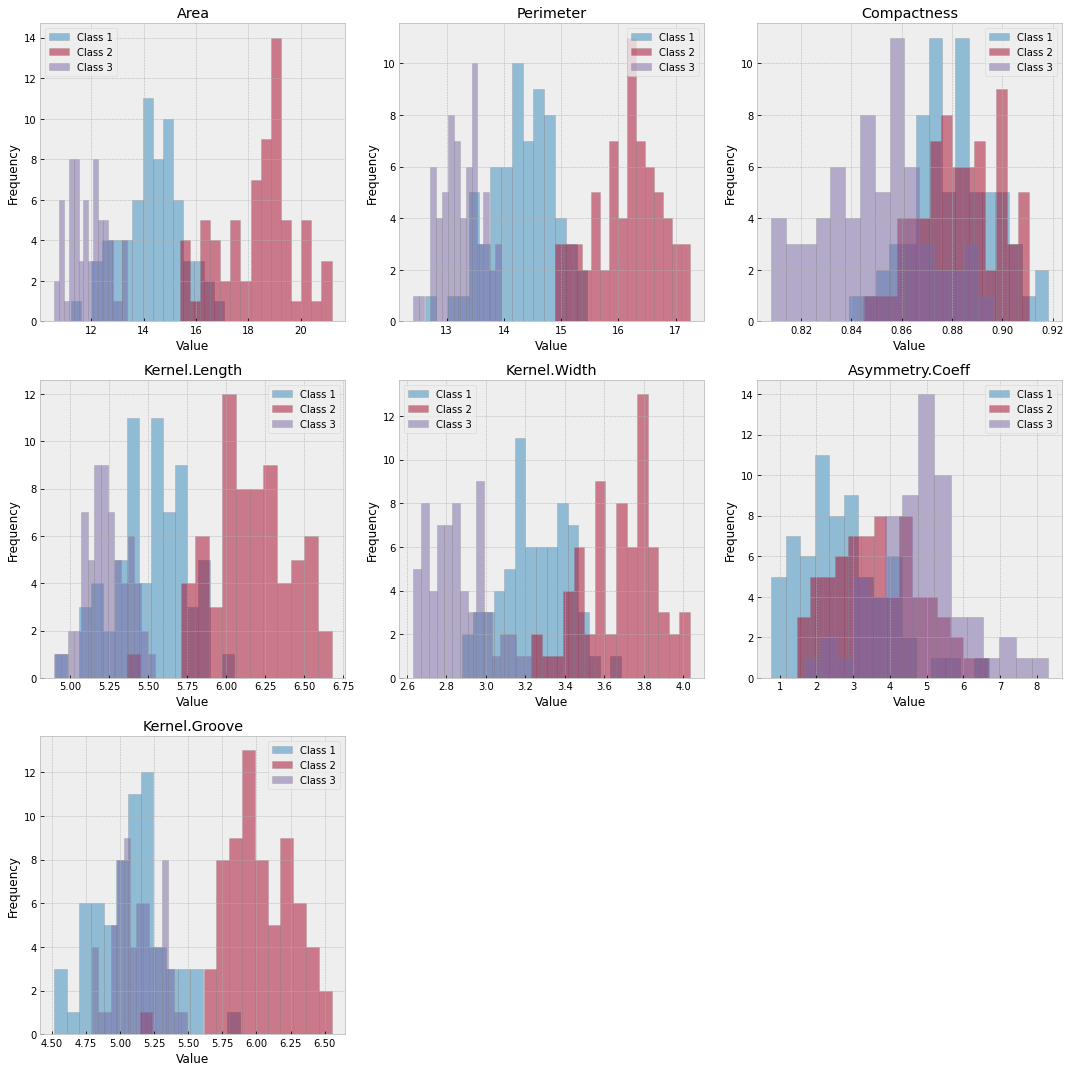

In [12]:
# Number of features
n_features = X.shape[1]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each feature
for i in range(n_features):
    ax = axes[i]
    # Select the column corresponding to the feature
    feature = X[:, i]

    # Plot histograms for each class in this feature
    for label in np.unique(Y):
        ax.hist(feature[Y == label], bins=15, alpha=0.5, label=f'Class {label}', edgecolor="grey")

    ax.set_title(column_names[i])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

# Hide any unused subplots
for j in range(n_features, len(axes)):
    fig.delaxes(axes[j])

# Display the plots
plt.tight_layout()
# plt.savefig("dataHist.png", dpi = 200)
plt.show()


Before, we chose the best pair of features that separated the classes. Now, using these histograms, we see that features "Area" and "Perimeter" do a good job of differentiating the classes. Features "Kernel.Width" and "Kernel.Length" do not perform too badly either. However, in other features histograms we can observe the intertwined natures of the different classes of data.

## Preprocessing and Normalization
In this section, we normalize the data using the z-score normalization we implemented before. This will scale all the features to have the same scale and places them in the interval $[-1, 1]$. This will allow for preventing the effects of magnitude of the numerical values of the features having a bigger impact than they should. This also allows for training time to reduce.

In [13]:
X_norm = zscore_normalize(X)

## Split Data
Here we split the data into train/test sets.

In [14]:
# Create a mask for splitting
np.random.seed(30)
numzero = int(0.2 * X.shape[0])
mask = np.array([0] * numzero + [1] * (X.shape[0] - numzero))
np.random.shuffle(mask)

# Split into train/test
X_train = X_norm[mask==1]
X_test = X_norm[mask==0]

Y_train = Y[mask==1]
Y_test = Y[mask==0]

## Logistic Regression Dichotomizer

### Model

Now, we implement the logistic regression binary classifier. Later we will use the one against all technique to use it for the three class dataset we have.

The model for a logistic regression is,
$$\hat y = h_w(x) = \sigma(w^Tx), $$
where $w$ are the weights and $\sigma$ is the sigmoid function,
$$\sigma = \frac{1}{1 + \exp(-{z})}.$$

Let us start off by implementing this model.

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def model(x, weights):
    return sigmoid(np.dot(x, weights))

### Cost function

Now we implement the binary crossentropy loss function of the logistic regression, which has the following form:
$$\mathcal{L}(y, \hat y) = -y \log (\hat y) + (1 - y) \log (1 - \hat y)$$

In [16]:
def binaryCrossEntropyloss(y, y_hat):
    # Compute binary cross-entropy loss
    epsilon = 1e-9
    return -y * np.log(y_hat + epsilon) - (1 - y) * np.log(1 - y_hat + epsilon)

As for the cost function we have:
$$J(w) = \frac{1}{n} \sum_{i = 1} ^ n \mathcal{L}(y, h_w(x))$$

In [17]:
def cost(x, y, w):
    # Calculate the cost function using the loss function
    y_hat = model(x, w)
    return np.mean(binaryCrossEntropyloss(y, y_hat))

## Gradient Descent
Now to find the weights, we use gradient descent.

In [18]:
def gradient_descent(X_train, Y_train, alpha, iterations=1000000):
    n, feature_num = X_train.shape
    weights = np.zeros(feature_num)

    # To plot the learning curve
    errors = []

    for i in range(iterations):
        y_hat = model(X_train, weights)
        error = y_hat - Y_train
        grad = np.dot(X_train.T, error) / n
        weights -= alpha * grad
        
        # Record the cost every iteration
        current_cost = cost(X_train, Y_train, weights)
        errors.append(current_cost)
        
        # Print cost every 100 iterations to monitor convergence
        if i % 100 == 0:
            print(f'Cost at iteration {i}: {current_cost}')

    plot_training_error(errors)
    
    return weights

In [19]:
def plot_training_error(errors, title="Training Error over Iterations"):
    plt.figure(figsize=(10, 6))
    plt.plot(errors, label='Training Error')
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
def classify_logistic_regression(X_test, weights):
    prob = model(X_test, weights)
    return prob

## Train the Model Using One Against All

Cost at iteration 0: 0.6916725285307042
Cost at iteration 100: 0.5944442519685026
Cost at iteration 200: 0.544109546481944
Cost at iteration 300: 0.51323042015952
Cost at iteration 400: 0.4926813358478572
Cost at iteration 500: 0.4781482934767792
Cost at iteration 600: 0.4673392187721218
Cost at iteration 700: 0.45895025425854963
Cost at iteration 800: 0.45219843585455066
Cost at iteration 900: 0.4465918850980903
Cost at iteration 1000: 0.44180967500566837
Cost at iteration 1100: 0.4376356415379483
Cost at iteration 1200: 0.43392020388571717
Cost at iteration 1300: 0.4305574426291897
Cost at iteration 1400: 0.427470850680543
Cost at iteration 1500: 0.42460420232540796
Cost at iteration 1600: 0.4219155441922595


Cost at iteration 1700: 0.419373147041633
Cost at iteration 1800: 0.41695272148779094
Cost at iteration 1900: 0.4146354675058362
Cost at iteration 2000: 0.4124066854685326
Cost at iteration 2100: 0.41025477245367464
Cost at iteration 2200: 0.40817048735779
Cost at iteration 2300: 0.4061464064240864
Cost at iteration 2400: 0.40417651552273715
Cost at iteration 2500: 0.402255901881174
Cost at iteration 2600: 0.40038051896673077
Cost at iteration 2700: 0.39854700574114965
Cost at iteration 2800: 0.3967525467145734
Cost at iteration 2900: 0.39499476288248625
Cost at iteration 3000: 0.3932716262265773
Cost at iteration 3100: 0.39158139232691974
Cost at iteration 3200: 0.3899225469880685
Cost at iteration 3300: 0.3882937637753279
Cost at iteration 3400: 0.3866938700926351
Cost at iteration 3500: 0.3851218199821177
Cost at iteration 3600: 0.38357667223801484
Cost at iteration 3700: 0.3820575727403171
Cost at iteration 3800: 0.3805637401520506
Cost at iteration 3900: 0.3790944543073425
Cost at

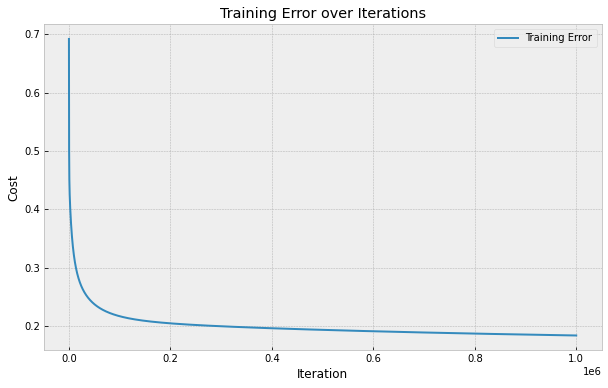

Cost at iteration 0: 0.6845953090411603
Cost at iteration 100: 0.3465578776219076
Cost at iteration 200: 0.2708599294784606
Cost at iteration 300: 0.23647245777547118
Cost at iteration 400: 0.21598003840641108
Cost at iteration 500: 0.20202701561158162
Cost at iteration 600: 0.19176609762211813
Cost at iteration 700: 0.18383770747460507
Cost at iteration 800: 0.17749793923660973
Cost at iteration 900: 0.1722991958940318
Cost at iteration 1000: 0.16795278901152252
Cost at iteration 1100: 0.16426246837229255
Cost at iteration 1200: 0.16108925412815184
Cost at iteration 1300: 0.1583314694002809
Cost at iteration 1400: 0.15591273838321743
Cost at iteration 1500: 0.1537744263592474
Cost at iteration 1600: 0.1518706880963554
Cost at iteration 1700: 0.15016511616137057
Cost at iteration 1800: 0.14862840772287872
Cost at iteration 1900: 0.14723670077364032
Cost at iteration 2000: 0.1459703627057544
Cost at iteration 2100: 0.14481309204508838
Cost at iteration 2200: 0.14375124164091685
Cost at 

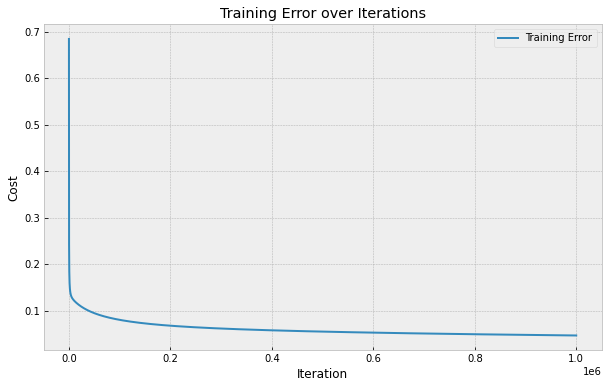

Cost at iteration 0: 0.6866462437833298
Cost at iteration 100: 0.42491378308470595
Cost at iteration 200: 0.3656337246851814
Cost at iteration 300: 0.3378140091797076
Cost at iteration 400: 0.3203995556906969
Cost at iteration 500: 0.3079989849990554
Cost at iteration 600: 0.29855419214302775
Cost at iteration 700: 0.29106149385582025
Cost at iteration 800: 0.2849483180450191
Cost at iteration 900: 0.27985333004201907
Cost at iteration 1000: 0.27553293895624964
Cost at iteration 1100: 0.27181540342850763
Cost at iteration 1200: 0.2685756906118252
Cost at iteration 1300: 0.26572052862900775
Cost at iteration 1400: 0.263178968474102
Cost at iteration 1500: 0.2608961545731694
Cost at iteration 1600: 0.25882907367831276
Cost at iteration 1700: 0.25694357746662394
Cost at iteration 1800: 0.2552122528989177
Cost at iteration 1900: 0.25361287180595593
Cost at iteration 2000: 0.25212724475438936
Cost at iteration 2100: 0.25074036219226153
Cost at iteration 2200: 0.24943974293365462
Cost at ite

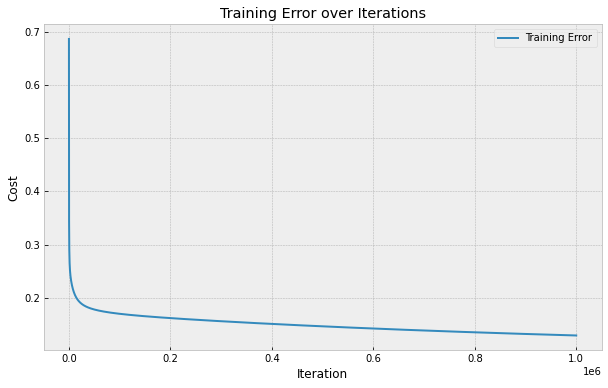

In [21]:
Y_train_1 = (Y_train == 1).astype(int)
Y_train_2 = (Y_train == 2).astype(int)
Y_train_3 = (Y_train == 3).astype(int)

weights1 = gradient_descent(X_train, Y_train_1, 0.01)
weights2 = gradient_descent(X_train, Y_train_2, 0.01)
weights3 = gradient_descent(X_train, Y_train_3, 0.01)

## Prediction

In [22]:
def classify(X_test, weights1, weights2, weights3):
    X_prob = np.array(\
        [classify_logistic_regression(X_test, weights1),
            classify_logistic_regression(X_test, weights2),
                classify_logistic_regression(X_test, weights3)]
    )

    X_hat = np.argmax(X_prob, axis=0) + 1
    return X_hat

In [23]:
X_train_hat = classify(X_train, weights1, weights2, weights3)
X_hat = classify(X_test, weights1, weights2, weights3)
print("Training accuracy: ", np.sum(X_train_hat == Y_train) / Y_train.shape[0])
print("Test accuracy: ", np.sum(X_hat == Y_test) / Y_test.shape[0])

Training accuracy:  0.98125
Test accuracy:  0.9743589743589743


## Metrics
Now we find out how accurate and precise our model has been at predicting. We will use error metrics like accuracy, precision, recall, F1-score, confusion matrix.

In [24]:
def confusion_matrix(y_true, y_pred, classes):
    matrix = np.zeros((classes, classes), int)
    for true, pred in zip(y_true, y_pred):
        matrix[true-1][pred-1] += 1
    return matrix

def calculate_metrics(conf_matrix):
    tp = np.diag(conf_matrix)
    fp = np.sum(conf_matrix, axis=0) - tp
    fn = np.sum(conf_matrix, axis=1) - tp
    tn = conf_matrix.sum() - (fp + fn + tp)

    # Calculate Precision, Recall, and F1-score per class
    precision = np.where(tp + fp == 0, 0, tp / (tp + fp))
    recall = np.where(tp + fn == 0, 0, tp / (tp + fn))
    f1_score = np.where((precision + recall) == 0, 0, 2 * (precision * recall) / (precision + recall))

    return precision, recall, f1_score

def overall_accuracy(y_true, y_pred):
    # Calculate overall accuracy
    return np.mean(y_true == y_pred)

def evaluate_classification(y_true, y_pred, classes=3):
    conf_matrix = confusion_matrix(y_true, y_pred, classes)
    precision, recall, f1_score = calculate_metrics(conf_matrix)
    accuracy = overall_accuracy(y_true, y_pred)
    return [conf_matrix, precision, recall, f1_score, accuracy]


Metrics for the training error.

In [25]:
metric_train = evaluate_classification(Y_train, X_train_hat)

print("Overal Accuracy of Training Data Prediction: ", metric_train[4])
print("Precision of Training Data Prediction For Classes 1, 2, and 3: ", metric_train[1])
print("Recall of Training Data Prediction For Classes 1, 2, and 3: ", metric_train[2])
print("F1_Score of Training Data Prediction For Classes 1, 2, and 3: ", metric_train[3])
print("Confusion Matrix of Training Data Prediction For Classes 1, 2, and 3: \n", metric_train[0])

Overal Accuracy of Training Data Prediction:  0.98125
Precision of Training Data Prediction For Classes 1, 2, and 3:  [0.98039216 0.98305085 0.98      ]
Recall of Training Data Prediction For Classes 1, 2, and 3:  [0.96153846 1.         0.98      ]
F1_Score of Training Data Prediction For Classes 1, 2, and 3:  [0.97087379 0.99145299 0.98      ]
Confusion Matrix of Training Data Prediction For Classes 1, 2, and 3: 
 [[50  1  1]
 [ 0 58  0]
 [ 1  0 49]]


Metrics for the test error.

In [26]:
metric_test = evaluate_classification(Y_test, X_hat)

print("Overall Accuracy of Error Data Prediction: ", metric_test[4])
print("Precision of Error Data Prediction For Classes 1, 2, and 3: ", metric_test[1])
print("Recall of Error Data Prediction For Classes 1, 2, and 3: ", metric_test[2])
print("F1_Score of Error Data Prediction For Classes 1, 2, and 3: ", metric_test[3])
print("Confusion Matrix of Error Data Prediction: \n", metric_test[0])

Overal Accuracy of Error Data Prediction:  0.9743589743589743
Precision of Error Data Prediction For Classes 1, 2, and 3:  [1.     1.     0.9375]
Recall of Error Data Prediction For Classes 1, 2, and 3:  [0.92857143 1.         1.        ]
F1_Score of Error Data Prediction For Classes 1, 2, and 3:  [0.96296296 1.         0.96774194]
Confusion Matrix of Error Data Prediction: 
 [[13  0  1]
 [ 0 10  0]
 [ 0  0 15]]


We can see that the results are quite satisfactory overall both in the training error and test error.